In [1]:
import sys
import os
import numpy as np

# Add the src directory to the path
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('..'))

# Import the BaseAgent class
from src.agents.q_learning_agent import QLearningAgent
from src.agents.my_agents.enhanced_qlearning_agent import MonAgent1
from src.agents.my_agents.sarsa_agent import SARSAAgent
from src.agents.my_agents.expectedsarsa_agent import ExpectedSARSAAgent
from src.agents.my_agents.dqn_agent import DQNAgent

In [2]:
from env_sailing import SailingEnv
from initial_windfields import get_initial_windfield

### Testing the Agent's Validity

Let's make the agent do a few steps to check that everything is working

In [3]:
# Instead of validating the agent here, we'll just demonstrate it on a simple task
from src.env_sailing import SailingEnv

# Create a simple environment
env = SailingEnv()
observation, info = env.reset(seed=42)
state_dim = len(observation)

# Initialize our agents
mon_agent1 = MonAgent1()
mon_agent1.seed(42)

sarsa_agent = SARSAAgent()
sarsa_agent.seed(42)

expectedsarsa_agent = ExpectedSARSAAgent()
expectedsarsa_agent.seed(42)

dqn_agent = DQNAgent(state_dim=state_dim)
dqn_agent.seed(42)

# Run the agent for a few steps
print("Running my agent 1 for 5 steps:")
for i in range(5):
    action = mon_agent1.act(observation)
    observation, reward, done, truncated, info = env.step(action)
    print(f"Step {i+1}: Action={action}, Position={info['position']}, Reward={reward}")

# Run the agent for a few steps
print("Running my SARSA agent for 5 steps:")
for i in range(5):
    action = sarsa_agent.act(observation)
    observation, reward, done, truncated, info = env.step(action)
    print(f"Step {i+1}: Action={action}, Position={info['position']}, Reward={reward}")

# Run the agent for a few steps
print("Running my Expected SARSA agent for 5 steps:")
for i in range(5):
    action = expectedsarsa_agent.act(observation)
    observation, reward, done, truncated, info = env.step(action)
    print(f"Step {i+1}: Action={action}, Position={info['position']}, Reward={reward}")

# Run the agent for a few steps
print("Running my DQN agent for 5 steps:")
for i in range(5):
    action = dqn_agent.act(observation)
    observation, reward, done, truncated, info = env.step(action)
    print(f"Step {i+1}: Action={action}, Position={info['position']}, Reward={reward}")

Running my agent 1 for 5 steps:
Step 1: Action=0, Position=[16  1], Reward=0.0
Step 2: Action=0, Position=[16  1], Reward=0.0
Step 3: Action=0, Position=[16  2], Reward=0.0
Step 4: Action=0, Position=[16  2], Reward=0.0
Step 5: Action=4, Position=[16  1], Reward=0.0
Running my SARSA agent for 5 steps:
Step 1: Action=0, Position=[16  1], Reward=0.0
Step 2: Action=0, Position=[16  1], Reward=0.0
Step 3: Action=0, Position=[16  1], Reward=0.0
Step 4: Action=0, Position=[16  1], Reward=0.0
Step 5: Action=4, Position=[16  0], Reward=0.0
Running my Expected SARSA agent for 5 steps:
Step 1: Action=0, Position=[16  0], Reward=0.0
Step 2: Action=0, Position=[16  0], Reward=0.0
Step 3: Action=0, Position=[16  0], Reward=0.0
Step 4: Action=0, Position=[16  0], Reward=0.0
Step 5: Action=4, Position=[16  0], Reward=0.0
Running my DQN agent for 5 steps:
Step 1: Action=7, Position=[15  1], Reward=0.0
Step 2: Action=6, Position=[14  1], Reward=0.0
Step 3: Action=6, Position=[13  1], Reward=0.0
Step 4:

### Analysis of the Agent

The key requirements for a valid agent:

1. **Inheritance**: It inherits from `BaseAgent`
2. **Required Methods**: It implements all required methods (`act`, `reset`, `seed`)
3. **Action Selection**: It always returns action `0` (North)
4. **Simplicity**: It maintains no internal state and requires no complex logic

This agent provides a good baseline, but it has obvious limitations:

- It ignores wind conditions completely
- It will struggle when the wind is coming from the North
- It doesn't adapt its strategy based on the environment

Let's test the naive agent to see how well it performs:

In [4]:
from src.env_sailing import SailingEnv
from src.initial_windfields import get_initial_windfield

# Create an environment with a simple test initial windfield
env = SailingEnv(**get_initial_windfield('simple_static'))
# observation, info = env.reset(seed=42)
# state_dim = len(observation)
mon_agent = ExpectedSARSAAgent()

# Run a single episode
observation, info = env.reset(seed=42)
total_reward = 0
done = False
truncated = False
step_count = 0

print("Running the naive agent on the simple_static initial windfield:")
while not (done or truncated) and step_count < 1000:  # Limit to 100 steps
    action = mon_agent.act(observation)
    observation, reward, done, truncated, info = env.step(action)
    total_reward += reward
    step_count += 1
    
    # Print every 10 steps to avoid too much output
    if step_count % 10 == 0:
        print(f"Step {step_count}: Position={info['position']}, Reward={reward}")

print(f"\nEpisode finished after {step_count} steps with reward: {total_reward}")
print(f"Final position: {info['position']}")
print(f"Goal reached: {done}")

Running the naive agent on the simple_static initial windfield:
Step 10: Position=[15  6], Reward=0.0
Step 20: Position=[15 12], Reward=0.0
Step 30: Position=[14 13], Reward=0.0
Step 40: Position=[14 14], Reward=0.0
Step 50: Position=[14 14], Reward=0.0
Step 60: Position=[14 14], Reward=0.0
Step 70: Position=[14 15], Reward=0.0
Step 80: Position=[14 15], Reward=0.0
Step 90: Position=[14 16], Reward=0.0
Step 100: Position=[14 16], Reward=0.0
Step 110: Position=[13 18], Reward=0.0
Step 120: Position=[13 19], Reward=0.0
Step 130: Position=[13 19], Reward=0.0
Step 140: Position=[13 20], Reward=0.0
Step 150: Position=[13 19], Reward=0.0
Step 160: Position=[13 19], Reward=0.0
Step 170: Position=[13 20], Reward=0.0
Step 180: Position=[13 21], Reward=0.0
Step 190: Position=[12 20], Reward=0.0
Step 200: Position=[12 21], Reward=0.0
Step 210: Position=[12 21], Reward=0.0
Step 220: Position=[12 22], Reward=0.0
Step 230: Position=[12 22], Reward=0.0
Step 240: Position=[12 23], Reward=0.0
Step 250:

## Improving on the Naive Agent

The naive agent provides a good starting point, but there are many ways to improve it:

1. **Wind-Aware Agent**: Consider wind direction when choosing actions
2. **Goal-Directed Agent**: Calculate the direction to the goal and choose actions accordingly
3. **Physics-Based Agent**: Use sailing physics equations to determine the most efficient action

The key insight for sailing is that certain directions relative to the wind are more efficient than others:

- The sailing efficiency is highest when moving perpendicular to the wind (beam reach)
- It's difficult to sail directly into the wind (the "no-go zone" - less than 45° to the wind)
- The boat maintains momentum (inertia) between steps

Before diving into reinforcement learning, consider implementing a simple rule-based agent that incorporates these physics principles.

### Full Training of the Q-Learning Agent

Now let's train our agent for more episodes to get better performance. This will take longer but should result in a more effective agent.

*Note: You might want to adjust the number of episodes based on your available time. More episodes generally lead to better performance.*

In [12]:
# Create our Q-learning agent for full training
ql_agent_full = QLearningAgent(learning_rate=0.1, discount_factor=0.99, exploration_rate=0.3)

# Set fixed seed for reproducibility
np.random.seed(42)
ql_agent_full.seed(42)

# Create environment with a simple initial windfield
env = SailingEnv(**get_initial_windfield('training_1'))

# Training parameters
num_episodes = 100  # More episodes for better learning
max_steps = 1000

# Progress tracking
rewards_history = []
steps_history = []
success_history = []

# Training loop
print("Starting full training with 100 episodes...")
import time
start_time = time.time()

for episode in range(num_episodes):
    # Reset environment and get initial state
    observation, info = env.reset(seed=episode)  # Different seed each episode
    state = ql_agent_full.discretize_state(observation)
    
    total_reward = 0
    
    for step in range(max_steps):
        # Select action and take step
        action = ql_agent_full.act(observation)
        next_observation, reward, done, truncated, info = env.step(action)
        next_state = ql_agent_full.discretize_state(next_observation)
        
        # Update Q-table
        ql_agent_full.learn(state, action, reward, next_state)
        
        # Update state and total reward
        state = next_state
        observation = next_observation
        total_reward += reward
        
        # Break if episode is done
        if done or truncated:
            break
    
    # Record metrics
    rewards_history.append(total_reward)
    steps_history.append(step+1)
    success_history.append(done)
    
    # Update exploration rate (decrease over time)
    ql_agent_full.exploration_rate = max(0.05, ql_agent_full.exploration_rate * 0.98)
    
    # Print progress every 10 episodes
    if (episode + 1) % 10 == 0:
        success_rate = sum(success_history[-10:]) / 10 * 100
        print(f"Episode {episode+1}/100: Success rate (last 10): {success_rate:.1f}%")

training_time = time.time() - start_time

# Calculate overall success rate
success_rate = sum(success_history) / len(success_history) * 100

print(f"\nTraining completed in {training_time:.1f} seconds!")
print(f"Success rate: {success_rate:.1f}%")
print(f"Average reward: {np.mean(rewards_history):.2f}")
print(f"Average steps: {np.mean(steps_history):.1f}")
print(f"Q-table size: {len(ql_agent_full.q_table)} states")

ql_agent_full.save("outputs/ql_agent_full.pkl")

Starting full training with 100 episodes...
Episode 10/100: Success rate (last 10): 100.0%
Episode 20/100: Success rate (last 10): 100.0%
Episode 30/100: Success rate (last 10): 100.0%
Episode 40/100: Success rate (last 10): 100.0%
Episode 50/100: Success rate (last 10): 100.0%
Episode 60/100: Success rate (last 10): 100.0%
Episode 70/100: Success rate (last 10): 100.0%
Episode 80/100: Success rate (last 10): 100.0%
Episode 90/100: Success rate (last 10): 100.0%
Episode 100/100: Success rate (last 10): 100.0%

Training completed in 5.8 seconds!
Success rate: 100.0%
Average reward: 100.00
Average steps: 202.8
Q-table size: 514 states


### Visualizing Training Results

Let's visualize how our agent improved during training:

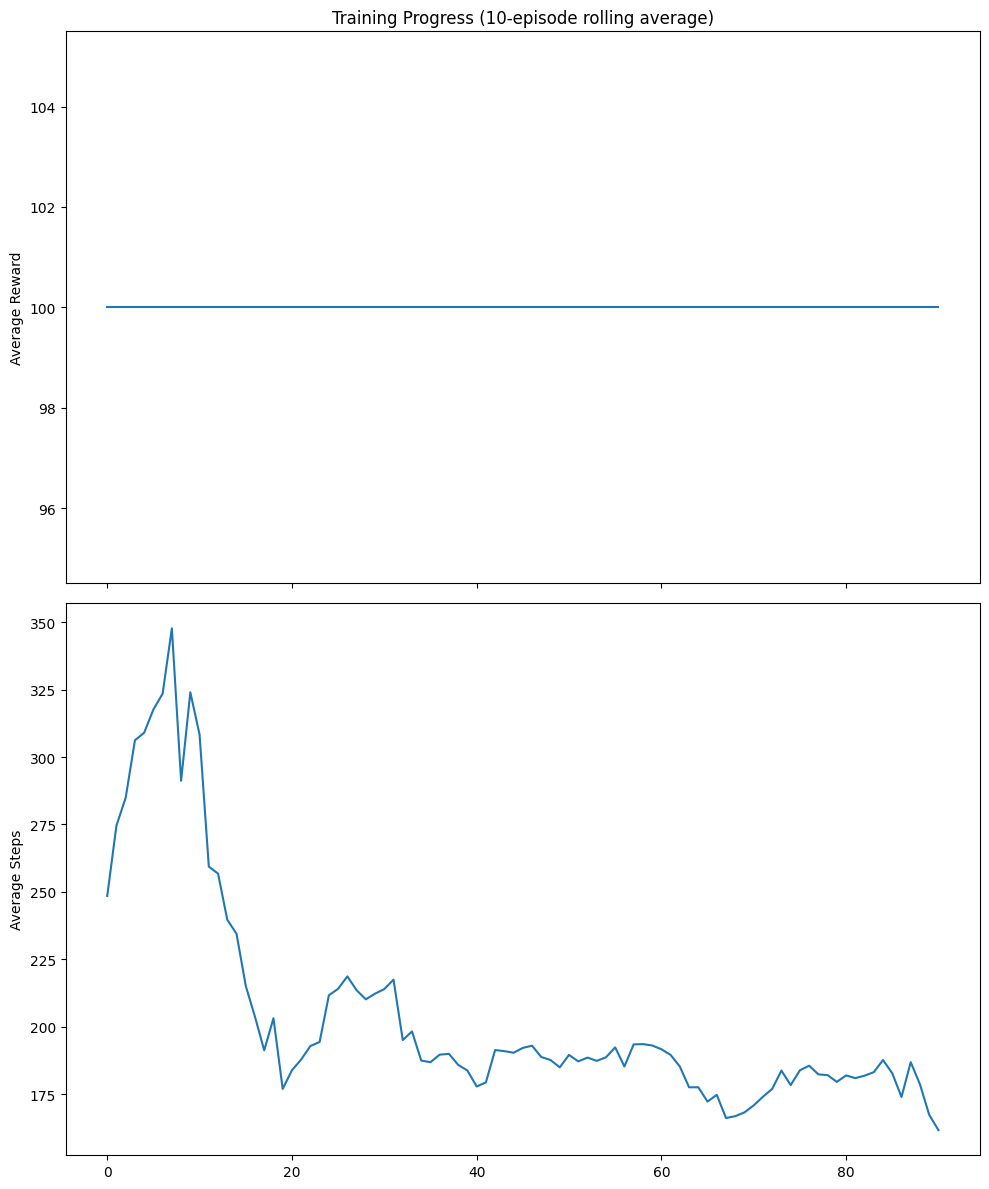

In [13]:
import matplotlib.pyplot as plt

# Calculate rolling averages
window_size = 10
rolling_rewards = np.convolve(rewards_history, np.ones(window_size)/window_size, mode='valid')
rolling_steps = np.convolve(steps_history, np.ones(window_size)/window_size, mode='valid')
rolling_success = np.convolve([1 if s else 0 for s in success_history], np.ones(window_size)/window_size, mode='valid') * 100

# Create the plots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot rewards
ax1.plot(rolling_rewards)
ax1.set_ylabel('Average Reward')
ax1.set_title('Training Progress (10-episode rolling average)')

# Plot steps
ax2.plot(rolling_steps)
ax2.set_ylabel('Average Steps')

# Plot success rate
#ax3.plot(rolling_success)
#ax3.set_ylabel('Success Rate (%)')
#ax3.set_xlabel('Episode')

plt.tight_layout()
plt.show()

### Entraînement Agent1

In [15]:
# Create our Q-learning agent for full training
enhanced_ql_agent_full = MonAgent1(learning_rate=0.1, discount_factor=0.99, exploration_rate=0.3)

# Set fixed seed for reproducibility
np.random.seed(42)
enhanced_ql_agent_full.seed(42)

# Create environment with a simple initial windfield
env = SailingEnv(**get_initial_windfield('training_1'))

# Training parameters
num_episodes = 100  # More episodes for better learning
max_steps = 1000

# Progress tracking
rewards_history = []
steps_history = []
success_history = []

# Training loop
print("Starting full training with 100 episodes...")
import time
start_time = time.time()

for episode in range(num_episodes):
    # Reset environment and get initial state
    observation, info = env.reset(seed=episode)  # Different seed each episode
    state = enhanced_ql_agent_full.discretize_state(observation)
    
    total_reward = 0
    
    for step in range(max_steps):
        # Select action and take step
        action = enhanced_ql_agent_full.act(observation)
        next_observation, reward, done, truncated, info = env.step(action)
        next_state = enhanced_ql_agent_full.discretize_state(next_observation)
        
        # Update Q-table
        enhanced_ql_agent_full.learn(state, action, reward, next_state)
        
        # Update state and total reward
        state = next_state
        observation = next_observation
        total_reward += reward
        
        # Break if episode is done
        if done or truncated:
            break
    
    # Record metrics
    rewards_history.append(total_reward)
    steps_history.append(step+1)
    success_history.append(done)
    
    # Update exploration rate (decrease over time)
    enhanced_ql_agent_full.exploration_rate = max(0.05, enhanced_ql_agent_full.exploration_rate * 0.98)
    
    # Print progress every 10 episodes
    if (episode + 1) % 10 == 0:
        success_rate = sum(success_history[-10:]) / 10 * 100
        print(f"Episode {episode+1}/100: Success rate (last 10): {success_rate:.1f}%")

training_time = time.time() - start_time

# Calculate overall success rate
success_rate = sum(success_history) / len(success_history) * 100

print(f"\nTraining completed in {training_time:.1f} seconds!")
print(f"Success rate: {success_rate:.1f}%")
print(f"Average reward: {np.mean(rewards_history):.2f}")
print(f"Average steps: {np.mean(steps_history):.1f}")
print(f"Q-table size: {len(enhanced_ql_agent_full.q_table)} states")

enhanced_ql_agent_full.save("outputs/enhanced_ql_agent.pkl")

Starting full training with 100 episodes...
Episode 10/100: Success rate (last 10): 100.0%
Episode 20/100: Success rate (last 10): 100.0%
Episode 30/100: Success rate (last 10): 100.0%
Episode 40/100: Success rate (last 10): 100.0%
Episode 50/100: Success rate (last 10): 100.0%
Episode 60/100: Success rate (last 10): 100.0%
Episode 70/100: Success rate (last 10): 100.0%
Episode 80/100: Success rate (last 10): 100.0%
Episode 90/100: Success rate (last 10): 100.0%
Episode 100/100: Success rate (last 10): 100.0%

Training completed in 7.0 seconds!
Success rate: 100.0%
Average reward: 98.00
Average steps: 204.2
Q-table size: 1006 states


### Visualizing Training Results

Let's visualize how our agent improved during training:

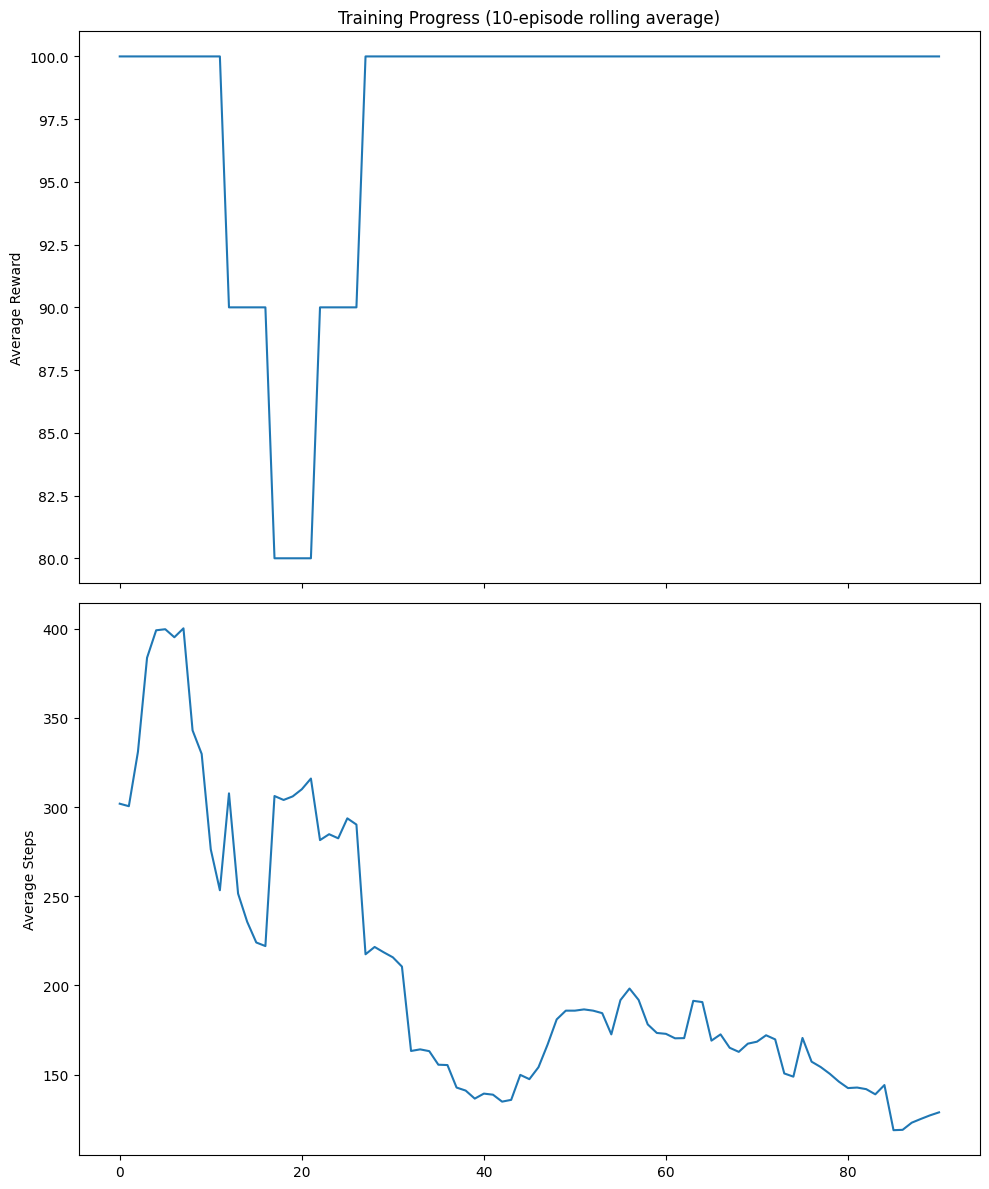

In [16]:
import matplotlib.pyplot as plt

# Calculate rolling averages
window_size = 10
rolling_rewards = np.convolve(rewards_history, np.ones(window_size)/window_size, mode='valid')
rolling_steps = np.convolve(steps_history, np.ones(window_size)/window_size, mode='valid')
rolling_success = np.convolve([1 if s else 0 for s in success_history], np.ones(window_size)/window_size, mode='valid') * 100

# Create the plots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot rewards
ax1.plot(rolling_rewards)
ax1.set_ylabel('Average Reward')
ax1.set_title('Training Progress (10-episode rolling average)')

# Plot steps
ax2.plot(rolling_steps)
ax2.set_ylabel('Average Steps')

# Plot success rate
#ax3.plot(rolling_success)
#ax3.set_ylabel('Success Rate (%)')
#ax3.set_xlabel('Episode')

plt.tight_layout()
plt.show()

### Entraînement de SARSA

In [17]:
# Créer l'agent SARSA
sarsa_agent = SARSAAgent(learning_rate=0.1, discount_factor=0.99, exploration_rate=0.3)

# Fixer la graine pour reproductibilité
np.random.seed(42)
sarsa_agent.seed(42)

# Environnement
env = SailingEnv(**get_initial_windfield('training_1'))

# Paramètres
num_episodes = 100
max_steps = 1000

# Historique
rewards_history = []
steps_history = []
success_history = []

print("Starting SARSA training with 100 episodes...")
start_time = time.time()

for episode in range(num_episodes):
    observation, info = env.reset(seed=episode)
    state = sarsa_agent.discretize_state(observation)
    action = sarsa_agent.act(observation)

    total_reward = 0

    for step in range(max_steps):
        next_observation, reward, done, truncated, info = env.step(action)
        next_state = sarsa_agent.discretize_state(next_observation)
        next_action = sarsa_agent.act(next_observation)

        # Mise à jour SARSA
        sarsa_agent.learn(state, action, reward, next_state, next_action)

        state = next_state
        action = next_action
        observation = next_observation
        total_reward += reward

        if done or truncated:
            break

    rewards_history.append(total_reward)
    steps_history.append(step + 1)
    success_history.append(done)

    # Diminuer l'exploration progressivement
    sarsa_agent.exploration_rate = max(0.05, sarsa_agent.exploration_rate * 0.98)

    if (episode + 1) % 10 == 0:
        success_rate = sum(success_history[-10:]) / 10 * 100
        print(f"Episode {episode + 1}/100: Success rate (last 10): {success_rate:.1f}%")

training_time = time.time() - start_time
success_rate = sum(success_history) / len(success_history) * 100

print(f"\nTraining completed in {training_time:.1f} seconds!")
print(f"Success rate: {success_rate:.1f}%")
print(f"Average reward: {np.mean(rewards_history):.2f}")
print(f"Average steps: {np.mean(steps_history):.1f}")
print(f"Q-table size: {len(sarsa_agent.q_table)} states")

# Sauvegarde du modèle
sarsa_agent.save("outputs/sarsa_agent.pkl")


Starting SARSA training with 100 episodes...
Episode 10/100: Success rate (last 10): 100.0%
Episode 20/100: Success rate (last 10): 100.0%
Episode 30/100: Success rate (last 10): 100.0%
Episode 40/100: Success rate (last 10): 100.0%
Episode 50/100: Success rate (last 10): 100.0%
Episode 60/100: Success rate (last 10): 100.0%
Episode 70/100: Success rate (last 10): 100.0%
Episode 80/100: Success rate (last 10): 100.0%
Episode 90/100: Success rate (last 10): 100.0%
Episode 100/100: Success rate (last 10): 100.0%

Training completed in 6.2 seconds!
Success rate: 100.0%
Average reward: 97.00
Average steps: 180.2
Q-table size: 862 states


### Visualizing Training Results

Let's visualize how our agent improved during training:

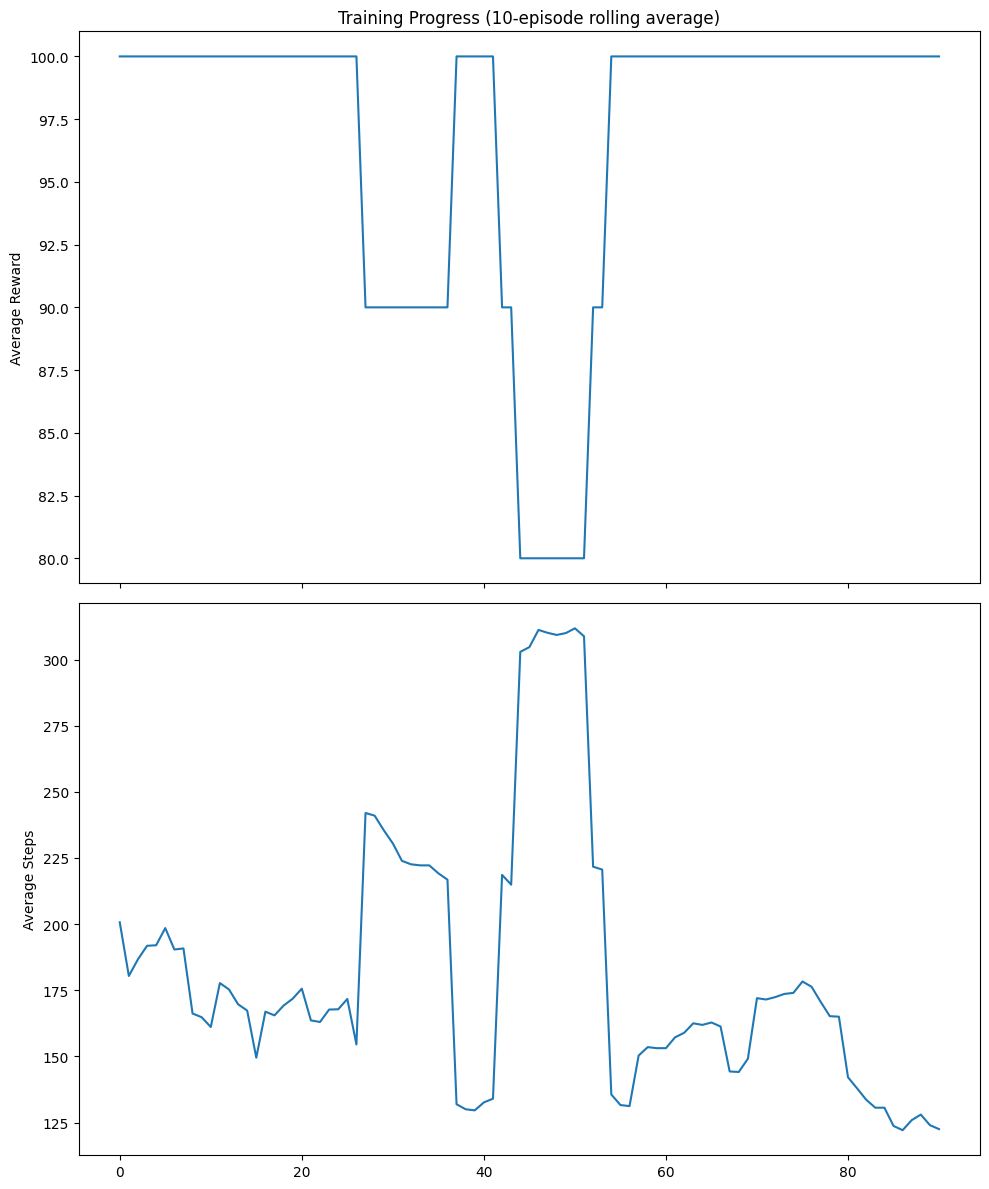

In [18]:
import matplotlib.pyplot as plt

# Calculate rolling averages
window_size = 10
rolling_rewards = np.convolve(rewards_history, np.ones(window_size)/window_size, mode='valid')
rolling_steps = np.convolve(steps_history, np.ones(window_size)/window_size, mode='valid')
rolling_success = np.convolve([1 if s else 0 for s in success_history], np.ones(window_size)/window_size, mode='valid') * 100

# Create the plots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot rewards
ax1.plot(rolling_rewards)
ax1.set_ylabel('Average Reward')
ax1.set_title('Training Progress (10-episode rolling average)')

# Plot steps
ax2.plot(rolling_steps)
ax2.set_ylabel('Average Steps')

# Plot success rate
#ax3.plot(rolling_success)
#ax3.set_ylabel('Success Rate (%)')
#ax3.set_xlabel('Episode')

plt.tight_layout()
plt.show()

### Entraînement Expected SARSA

In [19]:
# Créer l'agent Expected SARSA
expected_agent = ExpectedSARSAAgent(learning_rate=0.1, discount_factor=0.99, exploration_rate=0.3)

# Fixer la graine
np.random.seed(42)
expected_agent.seed(42)

# Environnement
env = SailingEnv(**get_initial_windfield('training_1'))

# Paramètres d'entraînement
num_episodes = 100
max_steps = 1000

rewards_history = []
steps_history = []
success_history = []

print("Starting Expected SARSA training with 100 episodes...")
start_time = time.time()

for episode in range(num_episodes):
    observation, info = env.reset(seed=episode)
    state = expected_agent.discretize_state(observation)

    total_reward = 0

    for step in range(max_steps):
        action = expected_agent.act(observation)
        next_observation, reward, done, truncated, info = env.step(action)
        next_state = expected_agent.discretize_state(next_observation)

        expected_agent.learn(state, action, reward, next_state)

        state = next_state
        observation = next_observation
        total_reward += reward

        if done or truncated:
            break

    rewards_history.append(total_reward)
    steps_history.append(step + 1)
    success_history.append(done)

    # Diminution progressive d'epsilon
    expected_agent.exploration_rate = max(0.05, expected_agent.exploration_rate * 0.98)

    if (episode + 1) % 10 == 0:
        success_rate = sum(success_history[-10:]) / 10 * 100
        print(f"Episode {episode + 1}/100: Success rate (last 10): {success_rate:.1f}%")

training_time = time.time() - start_time
success_rate = sum(success_history) / len(success_history) * 100

print(f"\nTraining completed in {training_time:.1f} seconds!")
print(f"Success rate: {success_rate:.1f}%")
print(f"Average reward: {np.mean(rewards_history):.2f}")
print(f"Average steps: {np.mean(steps_history):.1f}")
print(f"Q-table size: {len(expected_agent.q_table)} states")

# Sauvegarde
expected_agent.save("outputs/expected_sarsa_agent.pkl")

Starting Expected SARSA training with 100 episodes...
Episode 10/100: Success rate (last 10): 100.0%
Episode 20/100: Success rate (last 10): 100.0%
Episode 30/100: Success rate (last 10): 100.0%
Episode 40/100: Success rate (last 10): 100.0%
Episode 50/100: Success rate (last 10): 100.0%
Episode 60/100: Success rate (last 10): 100.0%
Episode 70/100: Success rate (last 10): 100.0%
Episode 80/100: Success rate (last 10): 100.0%
Episode 90/100: Success rate (last 10): 100.0%
Episode 100/100: Success rate (last 10): 100.0%

Training completed in 6.9 seconds!
Success rate: 100.0%
Average reward: 98.00
Average steps: 197.2
Q-table size: 1011 states


### Visualizing Training Results

Let's visualize how our agent improved during training:

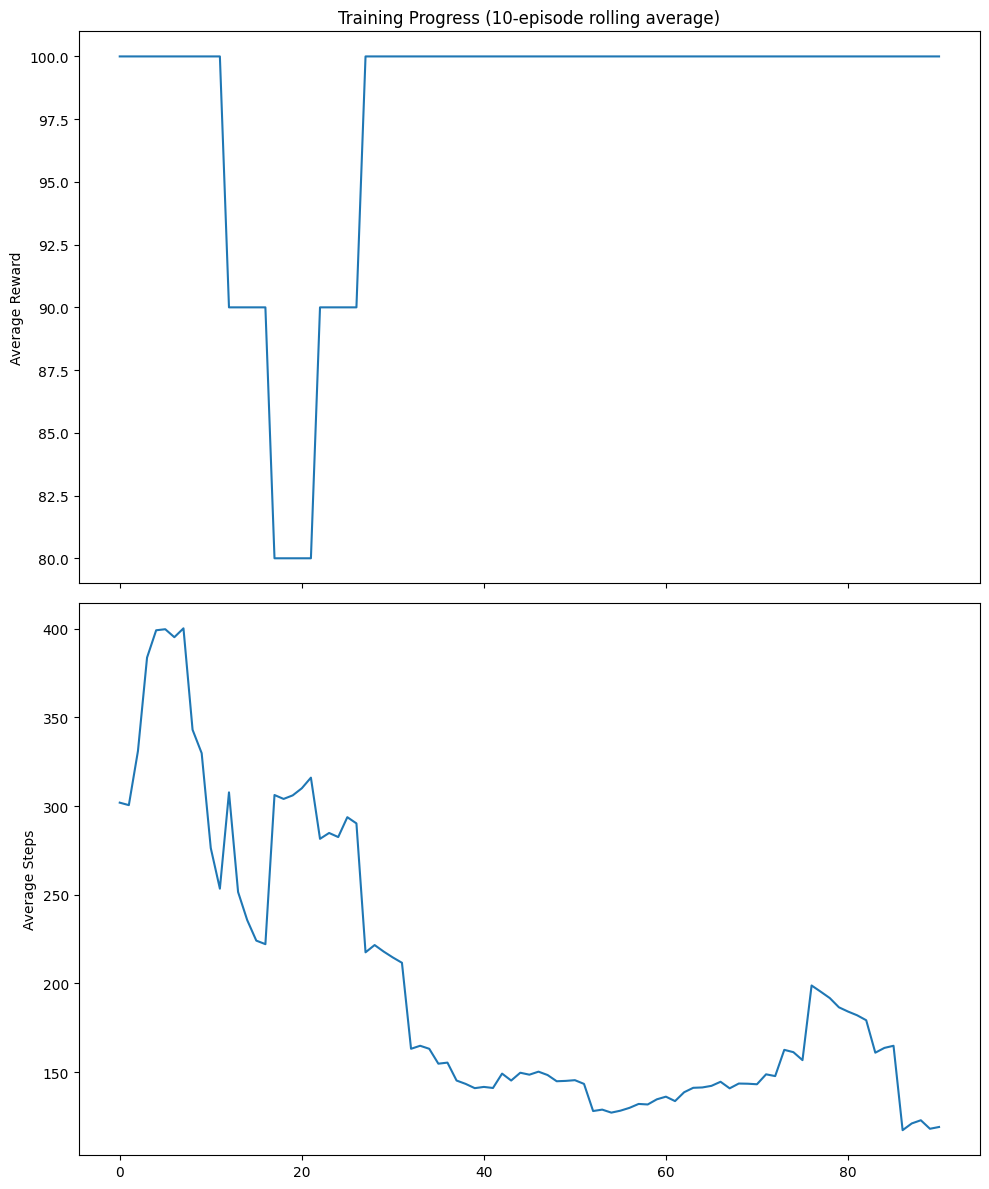

In [20]:
import matplotlib.pyplot as plt

# Calculate rolling averages
window_size = 10
rolling_rewards = np.convolve(rewards_history, np.ones(window_size)/window_size, mode='valid')
rolling_steps = np.convolve(steps_history, np.ones(window_size)/window_size, mode='valid')
rolling_success = np.convolve([1 if s else 0 for s in success_history], np.ones(window_size)/window_size, mode='valid') * 100

# Create the plots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot rewards
ax1.plot(rolling_rewards)
ax1.set_ylabel('Average Reward')
ax1.set_title('Training Progress (10-episode rolling average)')

# Plot steps
ax2.plot(rolling_steps)
ax2.set_ylabel('Average Steps')

# Plot success rate
#ax3.plot(rolling_success)
#ax3.set_ylabel('Success Rate (%)')
#ax3.set_xlabel('Episode')

plt.tight_layout()
plt.show()

In [29]:
from src.agents.my_agents.agent_spécial import SailingPhysicsAgent, HybridPhysicsQLearningAgent

### Entraînement Agent physique

In [33]:
# Créer l’agent physique
agent = SailingPhysicsAgent()

goal_default = np.array([17, 31])  # coin haut-droit d’une grille 32x32
agent.set_goal(goal_default)

# Environnement
env = SailingEnv(**get_initial_windfield("training_1"))

# Nombre d’épisodes
num_episodes = 100
max_steps = 1000

rewards_history = []
steps_history = []
success_history = []

print("🧭 Evaluating SailingPhysicsAgent...")
start_time = time.time()

for episode in range(num_episodes):
    obs, info = env.reset(seed=episode)

    # Le goal est dans info
    agent.set_goal(info["goal"])
    agent.reset()  # alterne le cap (virement de bord)

    total_reward = 0

    for step in range(max_steps):
        action = agent.act(obs)
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward

        if done or truncated:
            break

    rewards_history.append(total_reward)
    steps_history.append(step + 1)
    success_history.append(done)

    if (episode + 1) % 10 == 0:
        recent_success = sum(success_history[-10:]) / 10 * 100
        print(f"Episode {episode + 1}: success rate (last 10) = {recent_success:.1f}%")

training_time = time.time() - start_time
success_rate = sum(success_history) / len(success_history) * 100

print(f"\n✅ Evaluation completed in {training_time:.1f}s")
print(f"Success rate: {success_rate:.1f}%")
print(f"Avg reward: {np.mean(rewards_history):.2f}")
print(f"Avg steps: {np.mean(steps_history):.1f}")

🧭 Evaluating SailingPhysicsAgent...


KeyError: 'goal'

### Visualizing Training Results

Let's visualize how our agent improved during training:

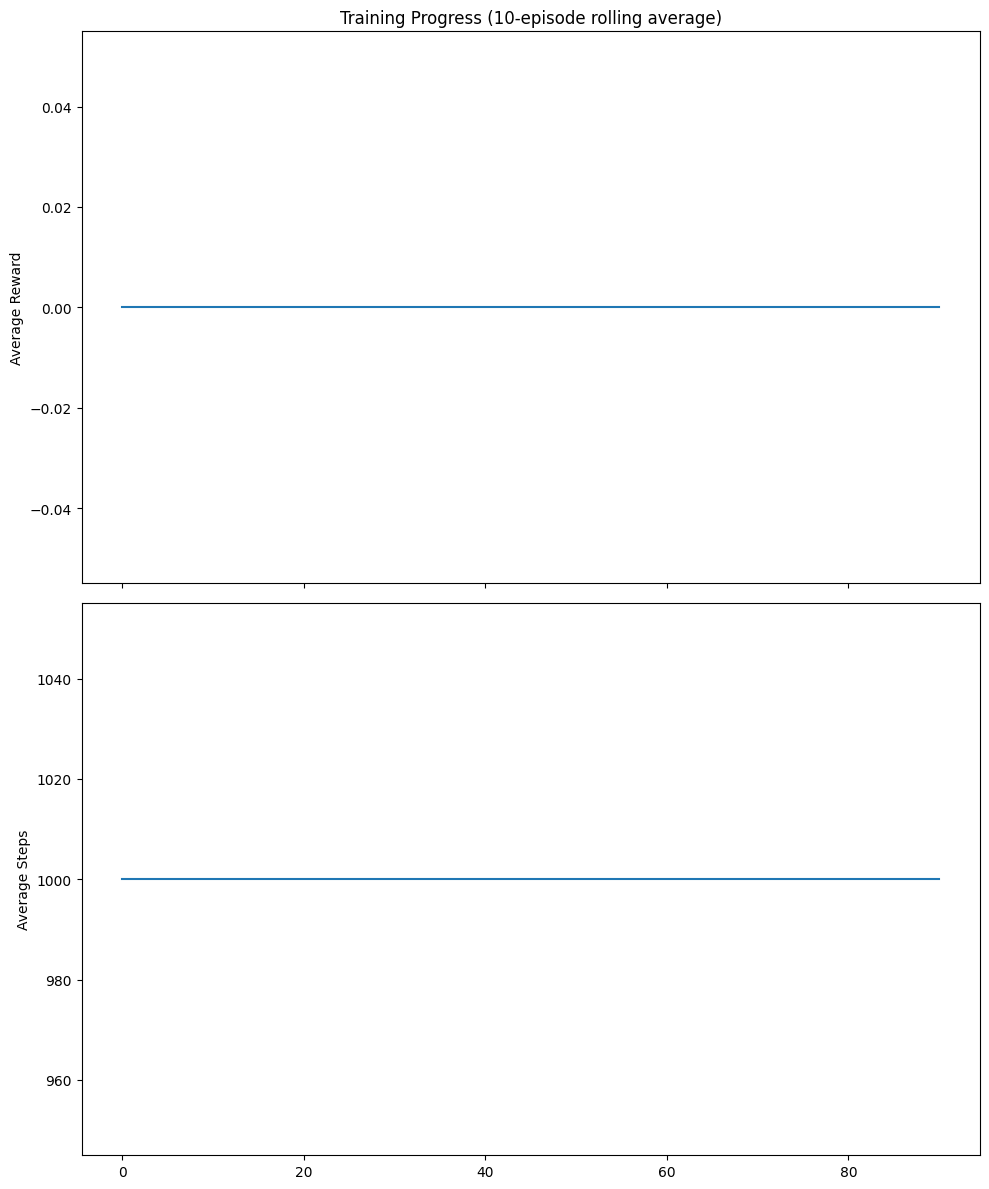

In [ ]:
import matplotlib.pyplot as plt

# Calculate rolling averages
window_size = 10
rolling_rewards = np.convolve(rewards_history, np.ones(window_size)/window_size, mode='valid')
rolling_steps = np.convolve(steps_history, np.ones(window_size)/window_size, mode='valid')
rolling_success = np.convolve([1 if s else 0 for s in success_history], np.ones(window_size)/window_size, mode='valid') * 100

# Create the plots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot rewards
ax1.plot(rolling_rewards)
ax1.set_ylabel('Average Reward')
ax1.set_title('Training Progress (10-episode rolling average)')

# Plot steps
ax2.plot(rolling_steps)
ax2.set_ylabel('Average Steps')

# Plot success rate
#ax3.plot(rolling_success)
#ax3.set_ylabel('Success Rate (%)')
#ax3.set_xlabel('Episode')

plt.tight_layout()
plt.show()

### Entraînement Agent Spécial

In [30]:
# Créer l’agent hybride
agent = HybridPhysicsQLearningAgent(learning_rate=0.1, discount_factor=0.99, exploration_rate=0.3)

# Fixer les graines
np.random.seed(42)
agent.seed(42)

# Créer l’environnement
env = SailingEnv(**get_initial_windfield("training_1"))

# Paramètres
num_episodes = 100
max_steps = 1000

rewards_history = []
steps_history = []
success_history = []

print("🚀 Starting hybrid agent training with 100 episodes...")
start_time = time.time()

for episode in range(num_episodes):
    obs, info = env.reset(seed=episode)
    state = agent.discretize_state(obs)
    total_reward = 0

    for step in range(max_steps):
        action = agent.act(obs)
        next_obs, reward, done, truncated, info = env.step(action)
        next_state = agent.discretize_state(next_obs)

        agent.learn(state, action, reward, next_state)

        state = next_state
        obs = next_obs
        total_reward += reward

        if done or truncated:
            break

    rewards_history.append(total_reward)
    steps_history.append(step + 1)
    success_history.append(done)

    # Évolution de epsilon
    agent.epsilon = max(0.05, agent.epsilon * 0.98)

    if (episode + 1) % 10 == 0:
        recent_success = sum(success_history[-10:]) / 10 * 100
        print(f"Episode {episode + 1}: success rate (last 10) = {recent_success:.1f}%")

training_time = time.time() - start_time
success_rate = sum(success_history) / len(success_history) * 100

print(f"\n✅ Training completed in {training_time:.1f}s")
print(f"Success rate: {success_rate:.1f}%")
print(f"Avg reward: {np.mean(rewards_history):.2f}")
print(f"Avg steps: {np.mean(steps_history):.1f}")
print(f"Q-table size: {len(agent.q_table)} states")

# Sauvegarde
agent.save("outputs/hybrid_agent.pkl")


🚀 Starting hybrid agent training with 100 episodes...
Episode 10: success rate (last 10) = 100.0%
Episode 20: success rate (last 10) = 100.0%
Episode 30: success rate (last 10) = 100.0%
Episode 40: success rate (last 10) = 100.0%
Episode 50: success rate (last 10) = 100.0%
Episode 60: success rate (last 10) = 100.0%
Episode 70: success rate (last 10) = 100.0%
Episode 80: success rate (last 10) = 100.0%
Episode 90: success rate (last 10) = 100.0%
Episode 100: success rate (last 10) = 100.0%

✅ Training completed in 37.2s
Success rate: 100.0%
Avg reward: 0.00
Avg steps: 1000.0
Q-table size: 2883 states


### Visualizing Training Results

Let's visualize how our agent improved during training:

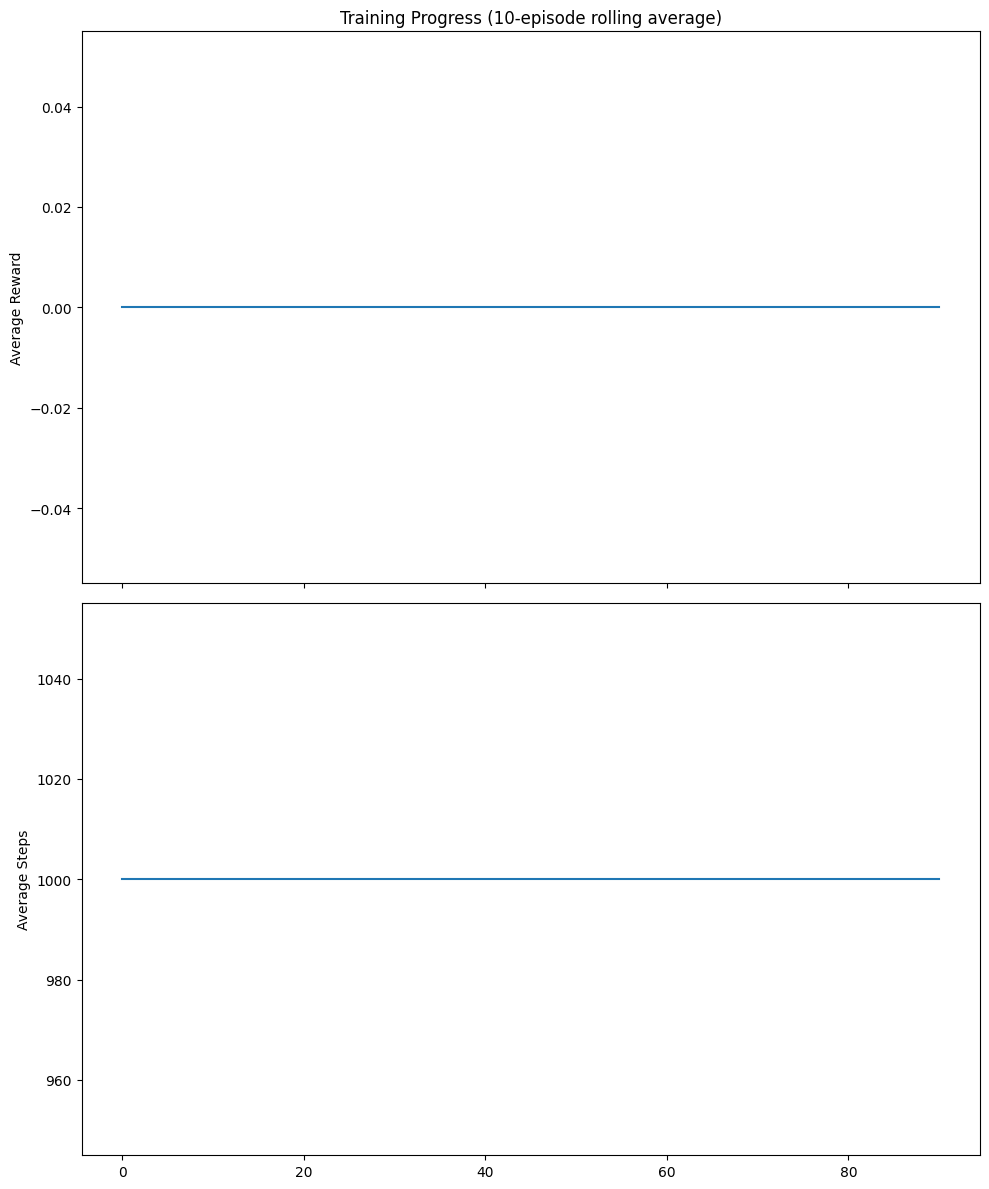

In [31]:
import matplotlib.pyplot as plt

# Calculate rolling averages
window_size = 10
rolling_rewards = np.convolve(rewards_history, np.ones(window_size)/window_size, mode='valid')
rolling_steps = np.convolve(steps_history, np.ones(window_size)/window_size, mode='valid')
rolling_success = np.convolve([1 if s else 0 for s in success_history], np.ones(window_size)/window_size, mode='valid') * 100

# Create the plots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot rewards
ax1.plot(rolling_rewards)
ax1.set_ylabel('Average Reward')
ax1.set_title('Training Progress (10-episode rolling average)')

# Plot steps
ax2.plot(rolling_steps)
ax2.set_ylabel('Average Steps')

# Plot success rate
#ax3.plot(rolling_success)
#ax3.set_ylabel('Success Rate (%)')
#ax3.set_xlabel('Episode')

plt.tight_layout()
plt.show()

### Entraînement Deep Q-Learning

In [ ]:
!pip install torch


In [10]:
# Paramètres
num_episodes = 100
max_steps = 1000
batch_size = 64

# Créer l’environnement
env = SailingEnv(**get_initial_windfield("training_1"))

# Dimensions : observation directe, pas besoin de discrétiser
example_obs, _ = env.reset(seed=0)
state_dim = len(example_obs)

# Créer l’agent DQN
agent = DQNAgent(state_dim=state_dim)

# Fixer les graines
np.random.seed(42)
agent.seed(42)

# Historique
rewards_history = []
steps_history = []
success_history = []

print("🚀 Starting DQN training with 100 episodes...")
start_time = time.time()

for episode in range(num_episodes):
    obs, _ = env.reset(seed=episode)
    total_reward = 0

    for step in range(max_steps):
        action = agent.act(obs)
        next_obs, reward, done, truncated, info = env.step(action)

        agent.remember(obs, action, reward, next_obs, done)
        agent.learn(batch_size=batch_size)

        obs = next_obs
        total_reward += reward

        if done or truncated:
            break

    rewards_history.append(total_reward)
    steps_history.append(step + 1)
    success_history.append(done)

    if (episode + 1) % 10 == 0:
        recent_success = sum(success_history[-10:]) / 10 * 100
        print(f"Episode {episode + 1}: success rate (last 10) = {recent_success:.1f}%")

# Résumé
training_time = time.time() - start_time
success_rate = sum(success_history) / len(success_history) * 100

print(f"\n✅ Training completed in {training_time:.1f}s")
print(f"Success rate: {success_rate:.1f}%")
print(f"Avg reward: {np.mean(rewards_history):.2f}")
print(f"Avg steps: {np.mean(steps_history):.1f}")

# Sauvegarde
agent.save("outputs/dqn_agent.pth")

🚀 Starting DQN training with 100 episodes...


KeyboardInterrupt: 

### Visualizing Training Results

Let's visualize how our agent improved during training:

In [ ]:
import matplotlib.pyplot as plt

# Calculate rolling averages
window_size = 10
rolling_rewards = np.convolve(rewards_history, np.ones(window_size)/window_size, mode='valid')
rolling_steps = np.convolve(steps_history, np.ones(window_size)/window_size, mode='valid')
rolling_success = np.convolve([1 if s else 0 for s in success_history], np.ones(window_size)/window_size, mode='valid') * 100

# Create the plots
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot rewards
ax1.plot(rolling_rewards)
ax1.set_ylabel('Average Reward')
ax1.set_title('Training Progress (10-episode rolling average)')

# Plot steps
ax2.plot(rolling_steps)
ax2.set_ylabel('Average Steps')

# Plot success rate
#ax3.plot(rolling_success)
#ax3.set_ylabel('Success Rate (%)')
#ax3.set_xlabel('Episode')

plt.tight_layout()
plt.show()

### Testing the Trained Agent

Now let's evaluate our trained agent with exploration turned off to see how well it performs on unseen seeds:

In [24]:
# Turn off exploration for evaluation
ql_agent_full.exploration_rate = 0

# Create test environment
test_env = SailingEnv(**get_initial_windfield('training_1'))

# Test parameters
num_test_episodes = 5
max_steps = 1000

print("Testing the trained agent on 5 new episodes...")
# Testing loop
for episode in range(num_test_episodes):
    # Reset environment
    observation, info = test_env.reset(seed=1000 + episode)  # Different seeds from training
    
    total_reward = 0
    
    for step in range(max_steps):
        # Select action using learned policy
        action = expectedsarsa_agent.act(observation)
        observation, reward, done, truncated, info = test_env.step(action)
        
        total_reward += reward
        
        # Break if episode is done
        if done or truncated:
            break
    
    print(f"Test Episode {episode+1}: Steps={step+1}, Reward={total_reward}, " +
          f"Position={info['position']}, Goal reached={done}")

Testing the trained agent on 5 new episodes...
Test Episode 1: Steps=1000, Reward=0.0, Position=[28 31], Goal reached=True
Test Episode 2: Steps=358, Reward=100.0, Position=[17 31], Goal reached=True
Test Episode 3: Steps=104, Reward=100.0, Position=[16 30], Goal reached=True
Test Episode 4: Steps=141, Reward=100.0, Position=[16 31], Goal reached=True
Test Episode 5: Steps=293, Reward=100.0, Position=[17 31], Goal reached=True


## Visualizing Your Agent's Behavior
Using evaluate_agent.ipynb for Visualization

## Save Your Agent For Submission

In [ ]:
# Import the utility function for saving Q-learning agents
from src.utils.agent_utils import save_qlearning_agent

# Save our trained agent
save_qlearning_agent(
    agent=ql_agent_full,
    output_path="../src/agents/agent_trained_example.py"
)

Agent saved to ../src/agents/agent_trained_example.py
The file contains 514 state-action pairs.
You can now use this file with validate_agent.ipynb and evaluate_agent.ipynb


In [26]:
# Save our trained agent
save_qlearning_agent(
    agent=enhanced_ql_agent_full,
    output_path="../src/agents/enhanced_ql_agent_trained.py"
)

Agent saved to ../src/agents/enhanced_ql_agent_trained.py
The file contains 1009 state-action pairs.
You can now use this file with validate_agent.ipynb and evaluate_agent.ipynb


In [27]:
# Save our trained agent
save_qlearning_agent(
    agent=sarsa_agent,
    output_path="../src/agents/sarsa_agent_trained.py"
)

Agent saved to ../src/agents/sarsa_agent_trained.py
The file contains 867 state-action pairs.
You can now use this file with validate_agent.ipynb and evaluate_agent.ipynb


In [28]:
# Save our trained agent
save_qlearning_agent(
    agent=expectedsarsa_agent,
    output_path="../src/agents/expectedsarsa_agent_trained.py"
)

Agent saved to ../src/agents/expectedsarsa_agent_trained.py
The file contains 222 state-action pairs.
You can now use this file with validate_agent.ipynb and evaluate_agent.ipynb


# Next Steps for Developing Your Own Agent

Now it's your turn to develop your own agent. Here are some suggestions:

1. **Enhance the Q-Learning Agent**:
   - Extend the state representation to incorporate the full wind field (not just local wind)
   - This would allow the agent to anticipate wind changes and plan better routes
   - Hint: Modify the `discretize_state` method to extract and process relevant features from the flattened wind field

2. **Algorithmic Improvements**:
   - Implement function approximation to handle continuous state spaces better
   - Explore other RL algorithms like SARSA, Expected SARSA, or Deep Q-Networks
   - Experiment with different exploration strategies that adapt over time

3. **Physics-Based Approaches**:
   - Leverage your understanding of sailing physics (from challenge_walkthrough notebook)
   - Implement rule-based algorithms or path planning (A*, etc.) that take advantage of domain knowledge
   - Create hybrid approaches that combine RL with domain-specific rules